In [1]:
# Importing Library

import pandas as pd
import numpy as np

from sklearn import metrics, preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

import seaborn as sb

In [2]:
# Creating size of graph

%matplotlib inline

rcParams['figure.figsize'] = 7,4
plt.style.use('seaborn-whitegrid')

In [3]:
# Reading the dataset in a dataframe using Pandas

df = pd.read_csv("loanAnalysis.csv")

# Data Preprocessing

### Handling Missing Values

In [4]:
# Finding Missing Values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#Imputing Missing values with mean for continuous variable

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [6]:
# Finding the number of rows

df.shape

(614, 13)

In [7]:
# Finding missing values

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Handling Duplicates

In [8]:
# Calculating duplicate tuples

df.duplicated().value_counts()

False    614
dtype: int64

### Handling Outliers

#### For ApplicantIncome and CoapplicantIncome

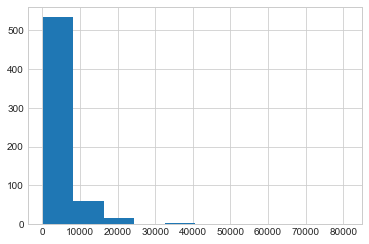

In [9]:
# Finding noisy data in ApplicantIncome by histogram

%matplotlib inline
df['ApplicantIncome'].hist()

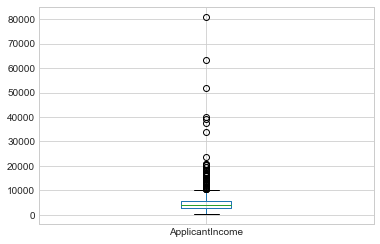

In [10]:
# Finding noisy data in ApplicantIncome by boxplot

df.boxplot(column='ApplicantIncome')

In [11]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

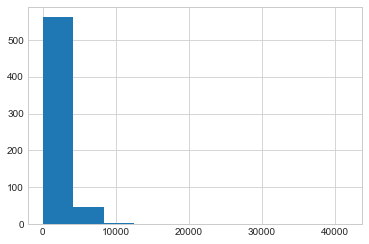

In [12]:
# Finding noisy data in CoapplicantIncome by histogram

df['CoapplicantIncome'].hist()

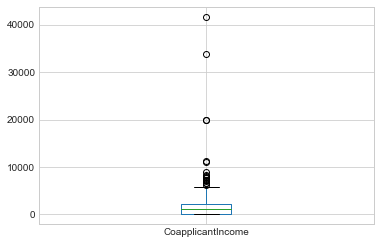

In [13]:
# Finding noisy data in CoapplicantIncome by boxplot

df.boxplot(column='CoapplicantIncome')

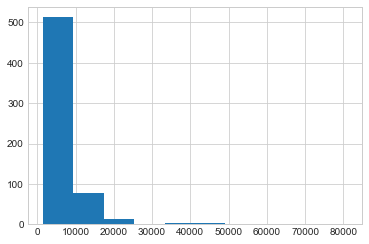

In [14]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Finding noisy data in TotalIncome by histogram

df['TotalIncome'].hist()

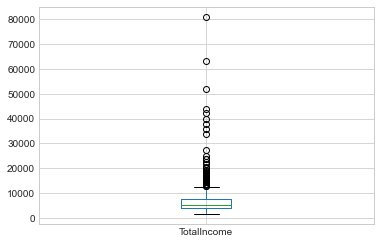

In [15]:
# Finding noisy data in TotalIncome by boxplot

df.boxplot(column='TotalIncome')

In [16]:
# Describing TotalIncome

df['TotalIncome'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: TotalIncome, dtype: float64

In [17]:
# Finding quartiles, inter-quartile range, minimum and maximum value of boxplot of TotalIncome

IQRTI = df['TotalIncome'].quantile(0.75) - df['TotalIncome'].quantile(0.25)
minTI = df['TotalIncome'].quantile(0.25) - 1.5 * IQRTI
maxTI = df['TotalIncome'].quantile(0.75) + 1.5 * IQRTI

In [18]:
# Removing  outliers in TotalIncome

df = df[df['TotalIncome'].between(minTI, maxTI)]

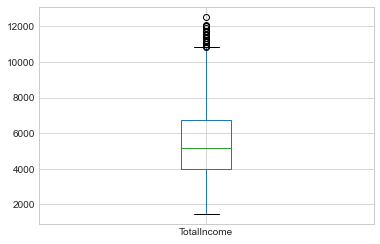

In [19]:
# Checking outliers for TotalIncome

df.boxplot(column = 'TotalIncome')

In [20]:
# Finding number of rows in dataset

df.shape

(564, 14)

# Data Preparation for Model Building

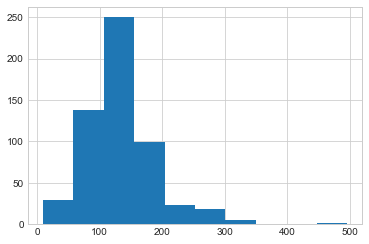

In [21]:
# Finding noisy data in LoanAmount by histogram

df['LoanAmount'].hist()

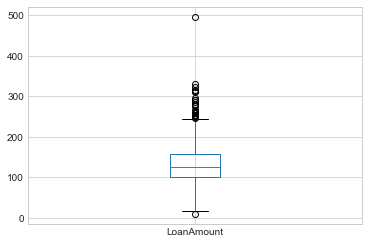

In [22]:
# Finding noisy data in LoanAmount by boxplot

df.boxplot(column = 'LoanAmount')

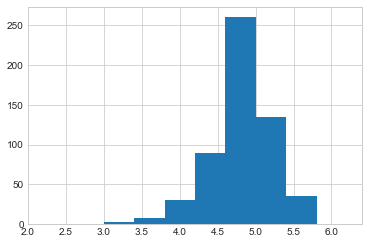

In [23]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the histogram distribtion of TotalIncome_log
df['LoanAmount_log'].hist()

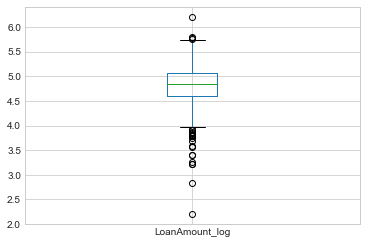

In [24]:
# Using boxplot to look at LoanAmount_log

df.boxplot(column = 'LoanAmount_log')

In [25]:
# Description of LoanAmount_log

df['LoanAmount_log'].describe()

count    564.000000
mean       4.807290
std        0.435606
min        2.197225
25%        4.605170
50%        4.840234
75%        5.062595
max        6.206576
Name: LoanAmount_log, dtype: float64

In [26]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

In [27]:
# Value count for Gender

df['Gender'].value_counts()

Male      459
Female    105
Name: Gender, dtype: int64

In [28]:
# Value count for Married

df['Married'].value_counts()

Yes    366
No     198
Name: Married, dtype: int64

In [29]:
# Value count for Dependents

df['Dependents'].value_counts()

0     337
2      94
1      91
3+     42
Name: Dependents, dtype: int64

In [30]:
# Value count for Education

df['Education'].value_counts()

Graduate        432
Not Graduate    132
Name: Education, dtype: int64

In [31]:
# Value count for Self_Employed

df['Self_Employed'].value_counts()

No     498
Yes     66
Name: Self_Employed, dtype: int64

In [32]:
# Value count for Credit_History

df['Credit_History'].value_counts()

1.0    483
0.0     81
Name: Credit_History, dtype: int64

In [33]:
# Value count for Property_Area

df['Property_Area'].value_counts()

Semiurban    217
Urban        185
Rural        162
Name: Property_Area, dtype: int64

In [34]:
# Value count for Loan_Status

df['Loan_Status'].value_counts()

Y    391
N    173
Name: Loan_Status, dtype: int64

In [35]:
# Encoding all variables to integers

cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area', 'Loan_Status']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
TotalIncome          float64
LoanAmount_log       float64
dtype: object

In [36]:
# Value count for Gender

df['Gender'].value_counts()

1    459
0    105
Name: Gender, dtype: int64

In [37]:
# Value count for Married

df['Married'].value_counts()

1    366
0    198
Name: Married, dtype: int64

In [38]:
# Value count for Dependents

df['Dependents'].value_counts()

0    337
2     94
1     91
3     42
Name: Dependents, dtype: int64

In [39]:
# Value count for Education

df['Education'].value_counts()

0    432
1    132
Name: Education, dtype: int64

In [40]:
# Value count for Self_Employed

df['Self_Employed'].value_counts()

0    498
1     66
Name: Self_Employed, dtype: int64

In [41]:
# Value count for Credit_History

df['Credit_History'].value_counts()

1    483
0     81
Name: Credit_History, dtype: int64

In [42]:
# Value count for Property_Area

df['Property_Area'].value_counts()

1    217
2    185
0    162
Name: Property_Area, dtype: int64

In [43]:
# Value count for Loan_Status

df['Loan_Status'].value_counts()

1    391
0    173
Name: Loan_Status, dtype: int64

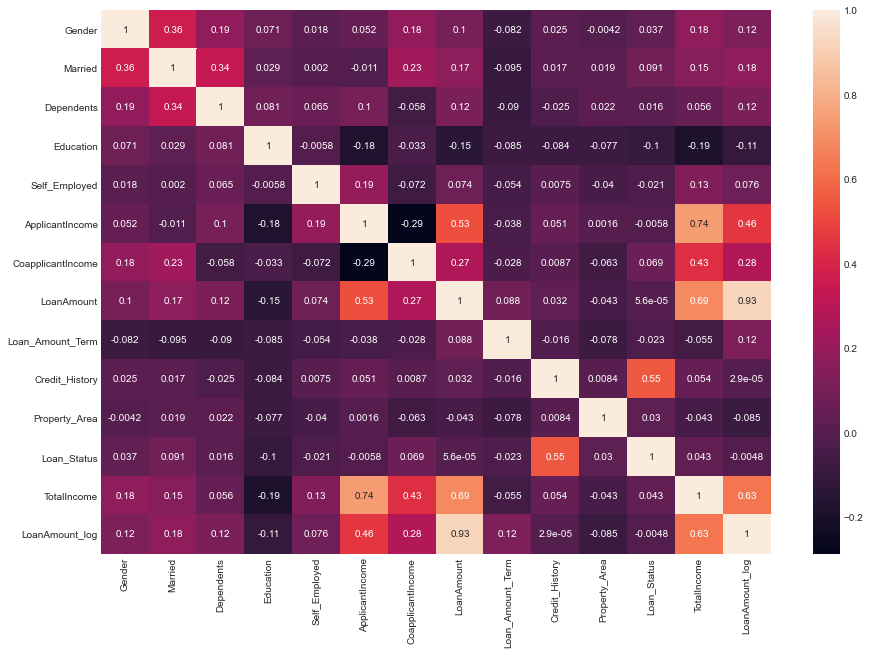

In [44]:
# Creating a heatmap

plt.figure(figsize = (15,10))
heat = sb.heatmap(df.corr(), annot = True)

The chances of getting loan will be higher if Applicant has a Credit history or Education

In [45]:
# Defining dependent and independent variables

feature_cols = ['Credit_History','Education']
X = df[feature_cols]
y = df['Loan_Status']

In [46]:
# split X and y into training and testing datasets by train_test_split

X_traintts, X_testtts, y_traintts, y_testtts = train_test_split(X, y, test_size = 0.1, random_state = 100)

In [47]:
LR = LogisticRegression()
MNB = MultinomialNB()
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
SVM = SVC()
RFC = RandomForestClassifier()

In [48]:
LR.fit(X_traintts, y_traintts)
y_predLRtts = LR.predict(X_testtts)
print(confusion_matrix(y_testtts, y_predLRtts))
print(accuracy_score(y_testtts, y_predLRtts))

[[ 9  4]
 [ 0 44]]
0.9298245614035088


In [49]:
MNB.fit(X_traintts, y_traintts)
y_predMNBtts = MNB.predict(X_testtts)
print(confusion_matrix(y_testtts, y_predMNBtts))
print(accuracy_score(y_testtts, y_predMNBtts))

[[ 0 13]
 [ 0 44]]
0.7719298245614035


In [50]:
KNC.fit(X_traintts, y_traintts)
y_predKNCtts = KNC.predict(X_testtts)
print(confusion_matrix(y_testtts, y_predKNCtts))
print(accuracy_score(y_testtts, y_predKNCtts))

[[ 9  4]
 [ 0 44]]
0.9298245614035088


In [51]:
DTC.fit(X_traintts, y_traintts)
y_predDTCtts = DTC.predict(X_testtts)
print(confusion_matrix(y_testtts, y_predDTCtts))
print(accuracy_score(y_testtts, y_predDTCtts))

[[ 9  4]
 [ 0 44]]
0.9298245614035088


In [52]:
SVM.fit(X_traintts, y_traintts)
y_predSVMtts = SVM.predict(X_testtts)
print(confusion_matrix(y_testtts, y_predSVMtts))
print(accuracy_score(y_testtts, y_predSVMtts))

[[ 9  4]
 [ 0 44]]
0.9298245614035088


In [53]:
RFC.fit(X_traintts, y_traintts)
y_predRFCtts = RFC.predict(X_testtts)
print(confusion_matrix(y_testtts, y_predRFCtts))
print(accuracy_score(y_testtts, y_predRFCtts))

[[ 9  4]
 [ 0 44]]
0.9298245614035088


In [54]:
# Use KFold to predict accuracy by LR

scoreLR = cross_val_score(LR, X, y, cv = 10)
print(scoreLR)
scoreLR.mean()

[0.8245614  0.8245614  0.75438596 0.75438596 0.80357143 0.78571429
 0.89285714 0.85714286 0.80357143 0.85714286]


0.8157894736842106

In [55]:
# Use KFold to predict accuracy by MNB

scoreMNB = cross_val_score(MNB, X, y, cv = 10)
print(scoreMNB)
scoreMNB.mean()

[0.70175439 0.68421053 0.68421053 0.68421053 0.69642857 0.69642857
 0.69642857 0.69642857 0.69642857 0.69642857]


0.6932957393483709

In [56]:
# Use KFold to predict accuracy by KNC

scoreKNC = cross_val_score(KNC, X, y, cv = 10)
print(scoreKNC)
scoreKNC.mean()

[0.40350877 0.68421053 0.75438596 0.75438596 0.80357143 0.78571429
 0.89285714 0.85714286 0.80357143 0.85714286]


0.7596491228070176

In [57]:
# Use KFold to predict accuracy by DTC

scoreDTC = cross_val_score(DTC, X, y, cv = 10)
print(scoreDTC)
scoreDTC.mean()

[0.8245614  0.8245614  0.75438596 0.75438596 0.80357143 0.78571429
 0.89285714 0.85714286 0.80357143 0.85714286]


0.8157894736842106

In [58]:
# Use KFold to predict accuracy by SVM

scoreSVM = cross_val_score(SVM, X, y, cv = 10)
print(scoreSVM)
scoreSVM.mean()

[0.8245614  0.8245614  0.75438596 0.75438596 0.80357143 0.78571429
 0.89285714 0.85714286 0.80357143 0.85714286]


0.8157894736842106

In [59]:
# Use KFold to predict accuracy by RFC

scoreRFC = cross_val_score(RFC, X, y, cv = 10)
print(scoreRFC)
scoreRFC.mean()

[0.8245614  0.8245614  0.75438596 0.75438596 0.80357143 0.78571429
 0.89285714 0.85714286 0.80357143 0.85714286]


0.8157894736842106